In [109]:
%run fungsi_save.ipynb

In [110]:
X = pd.read_csv('data_training.csv', sep=',',header=None) #read training data file
X = X.values #convert training data to array
total_features = np.size(X, axis=1)-2 #number of features
print(total_features)
y = X[:,total_features+1] #output for lymphoid classification (first step)
y = np.int_(y) #change the values to intiger
#print(y)
X = X[:,:total_features] #all features 
#X

29


In [111]:
total_features

29

In [112]:
from sklearn import linear_model

# Create an instance of the classifier
classifier = linear_model.LogisticRegression()

# Define objective function
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    global total_features
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    P = (classifier.predict(X_subset) == y).mean()
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

In [113]:
def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

In [114]:
# Initialize swarm, arbitrary
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO
dimensions = total_features # dimensions should be the number of features

optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=25)

2019-07-15 13:03:04,066 - pyswarms.discrete.binary - INFO - Optimize for 25 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary:   0%|                                                                                   |0/25c:\users\visual\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\visual\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\visual\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\visual\appdata\local\progra

In [115]:
# Create two instances of LogisticRegression
classifier = linear_model.LogisticRegression()

# Get the selected features from the final positions
X_selected_features = X[:,pos==1]  # subset
X_non_selected_features = X[:,pos==0]
# Perform classification and store performance in P
classifier.fit(X_selected_features, y)
print(np.size(X_selected_features,1))
# Compute performance
subset_performance = (classifier.predict(X_selected_features) == y).mean()


print('Subset performance: %.3f' % (subset_performance))

c:\users\visual\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


25
Subset performance: 0.851


In [116]:
X_non_selected_features

array([[ 94.20565 ,  69.651474,  90.74234 ,   0.854225],
       [ 89.645638,  91.766754,  45.065254,   0.951085],
       [ 93.051712,  95.880539,  58.551006,   0.912508],
       ...,
       [107.972321, 113.720123,  62.713585,   0.936161],
       [114.050499, 115.039482,  77.081238,   0.925244],
       [ 88.791573,  52.773445,  93.343544,   0.84774 ]])

In [117]:
optimizer.cost_history

[0.16609873480525927,
 0.16609873480525927,
 0.16609873480525927,
 0.16609873480525927,
 0.16609873480525927,
 0.15237310840982393,
 0.15237310840982393,
 0.15237310840982393,
 0.151740014884644,
 0.151740014884644,
 0.151740014884644,
 0.151740014884644,
 0.151740014884644,
 0.151740014884644,
 0.151740014884644,
 0.14760208385016124,
 0.14760208385016124,
 0.14760208385016124,
 0.14760208385016124,
 0.14760208385016124,
 0.14760208385016124,
 0.14760208385016124,
 0.14760208385016124,
 0.14760208385016124,
 0.14760208385016124]

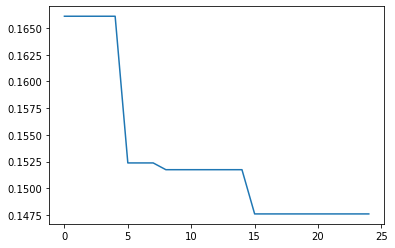

In [118]:
a = []
for i in range(len(optimizer.cost_history)):
    a.append(i)
b = optimizer.cost_history
plt.plot(a,b)
plt.show()

In [119]:
pos.shape
X_selected_features[0]

array([8.10980000e+04, 3.98100000e+03, 3.07630000e-01, 6.43040000e-02,
       2.03644100e+00, 3.94143330e+01, 1.15390500e+00, 4.13044000e-01,
       4.32722550e+01, 8.51912000e-01, 1.52102000e+05, 9.81900000e+03,
       3.20161000e-01, 1.98250000e-02, 5.99832150e+01, 4.49236870e+01,
       5.55503430e+01, 1.08813700e+00, 4.64932000e-01, 3.42439392e+02,
       3.55459000e-01, 2.07993700e+00, 7.44061000e-01, 5.33182000e-01,
       4.05438000e-01])

In [120]:
#y = np.array([y])
#y2 = np.array([y2])

In [121]:
#y.T.shape

In [122]:
#data_baru1 = np.concatenate((X, y.T), axis=1) #data semua +output1 
#data_baru1 = np.concatenate((data_baru1, y2.T), axis=1) #data semua +output1 +output2

In [124]:
save_data_feature1(pos) #data semua + pos beda file

In [ ]:
pos

In [125]:
pos = [i for i in pos]
pos

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1]

In [126]:
save_pos_step1('fix3(imbalanced)\step1\seleksi_fitur\hasil_step1.csv', (pos,optimizer.cost_history,subset_performance))